<a href="https://colab.research.google.com/github/tariz800/BookGenrePrediction/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
pylab.show()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
app_df = pd.read_csv('/content/applicant.csv')
loan_df= pd.read_csv('/content/loan.csv')

In [3]:
#checking first few columns of applicant.csv
app_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [4]:
loan_df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [5]:
#checking the shape of both data
app_df.shape,loan_df.shape

((1000, 15), (1000, 13))

**let's remove few columns that will be not useful for now, we will remove later if needed**

In [6]:
app_df.drop('applicant_id',axis=1,inplace = True)

In [7]:
loan_df.drop(['loan_application_id','applicant_id'],axis=1,inplace=True)

**Let's merge both dataset so we can do analysis properly**

In [8]:
merge = pd.concat([app_df,loan_df],axis=1)

In [9]:
#let's take a look after merging
merge.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [10]:
#shape of the dataset after merging
merge.shape


(1000, 25)

In [11]:
#let's check null values
missing = pd.DataFrame(merge.isnull().sum().sort_values(ascending=False),columns=['Null_Values'])
missing['null_%'] = missing['Null_Values']/merge.shape[0]*100
missing
#we will deal with null value late in dataprocessing

,Null_Values,null_%
Other_EMI_plans,814,81.4
Balance_in_existing_bank_account_(lower_limit_of_bucket),668,66.8
Telephone,596,59.6
Balance_in_existing_bank_account_(upper_limit_of_bucket),457,45.7
Has_been_employed_for_at_most,253,25.3
Savings_account_balance,183,18.3
Property,154,15.4
Has_been_employed_for_at_least,62,6.2
Purpose,12,1.2
Loan_history,0,0.0


# EDA

In [12]:
merge.describe()

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
#let's check datatype and other info of the data
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Primary_applicant_age_in_years                            1000 non-null   int64 
 1   Gender                                                    1000 non-null   object
 2   Marital_status                                            1000 non-null   object
 3   Number_of_dependents                                      1000 non-null   int64 
 4   Housing                                                   1000 non-null   object
 5   Years_at_current_residence                                1000 non-null   int64 
 6   Employment_status                                         1000 non-null   object
 7   Has_been_employed_for_at_least                            938 non-null    object
 8   Has_been_employed_for_at_most

In [14]:
merge.describe()

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
merge.skew()

Primary_applicant_age_in_years                 1.020739
Number_of_dependents                           1.909445
Years_at_current_residence                    -0.272570
Foreign_worker                                -4.913027
Months_loan_taken_for                          1.094184
Principal_loan_amount                          1.949628
EMI_rate_in_percentage_of_disposable_income   -0.531348
Has_coapplicant                                4.636536
Has_guarantor                                  4.041610
Number_of_existing_loans_at_this_bank          1.272576
high_risk_applicant                            0.874183
dtype: float64

**As we can see that here some columns have highly positively skewed or highly negatively skewed it means most of the columns does not normalize distribution**

<AxesSubplot: xlabel='high_risk_applicant', ylabel='count'>

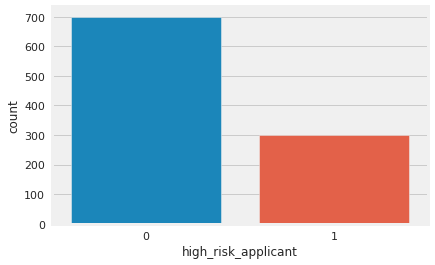

In [16]:
#let's take a first look of our dependent variable
sns.countplot(merge['high_risk_applicant'])

**Here are 70% are low credit risk  so Majority are not defaulters**

<Figure size 8000x3200 with 0 Axes>

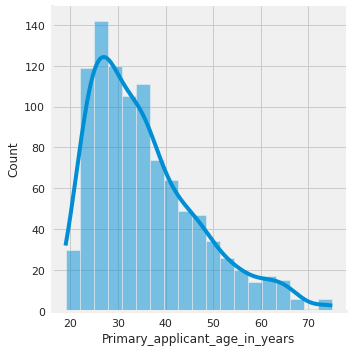

In [17]:
plt.figure(figsize=(20,8),dpi=400)
sns.displot(merge['Primary_applicant_age_in_years'],kde = True)
plt.show()

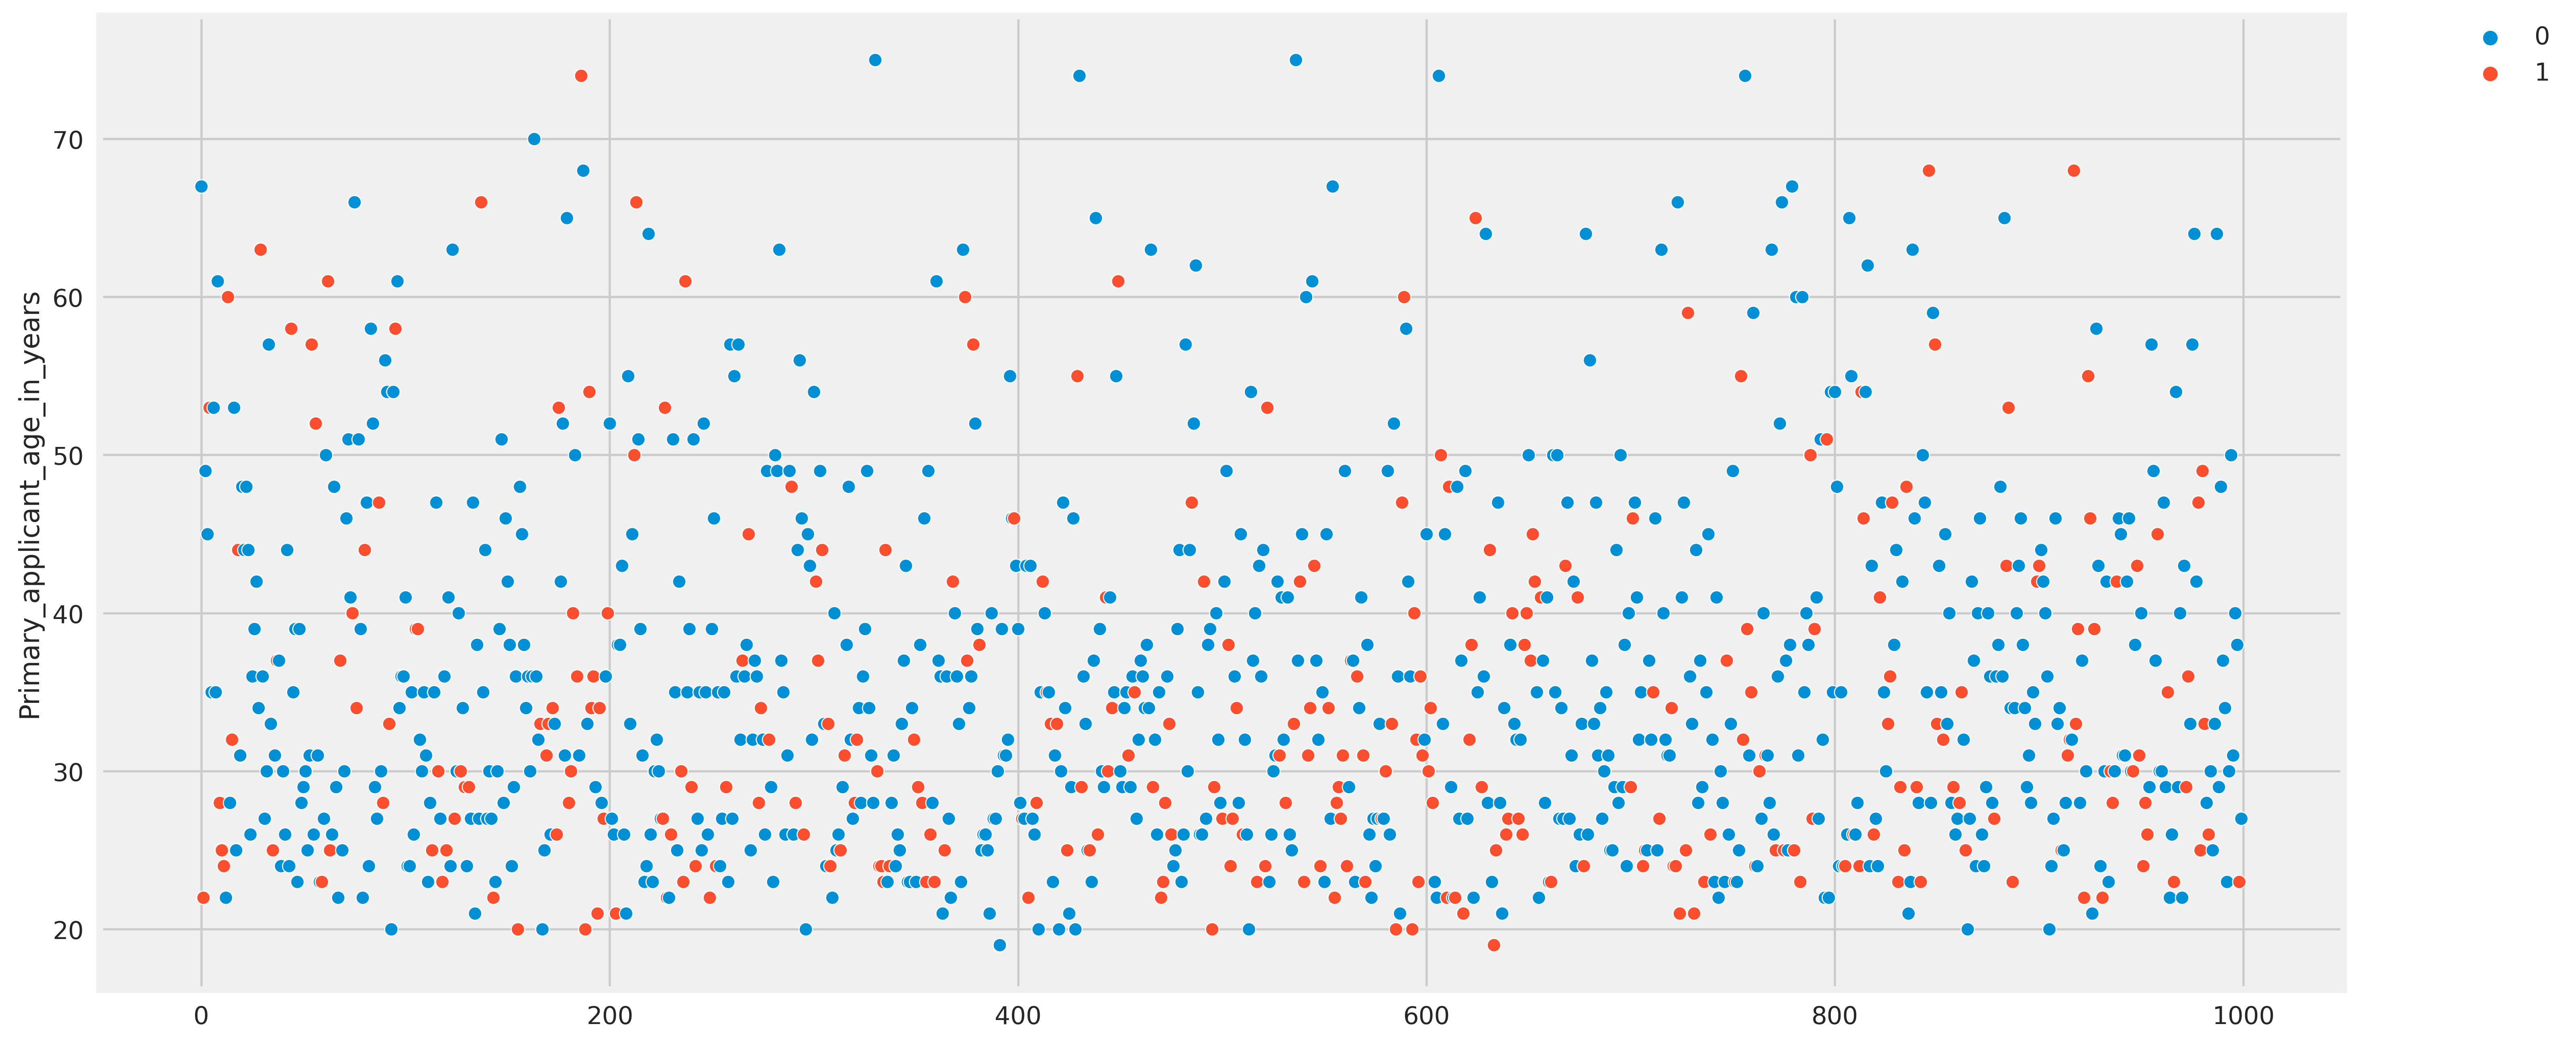

In [18]:
plt.figure(figsize=(16,8),dpi=400)
g = sns.scatterplot(x=merge.index,y = merge['Primary_applicant_age_in_years'],hue=merge['high_risk_applicant'])
h,l = g.get_legend_handles_labels()
plt.legend(h[0:13],l[0:13],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show(g)

**from the above scatter plot can't tell which age person is high risk applicant beacause data is spreaded**

<AxesSubplot: xlabel='Gender', ylabel='count'>

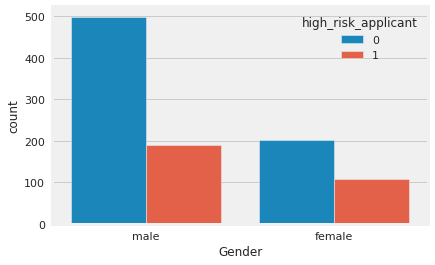

In [20]:
sns.countplot(merge['Gender'],hue=merge['high_risk_applicant'])

**Since from the above plot we can say that male is less high credit risk , the female has almost 50% high risk creditors**

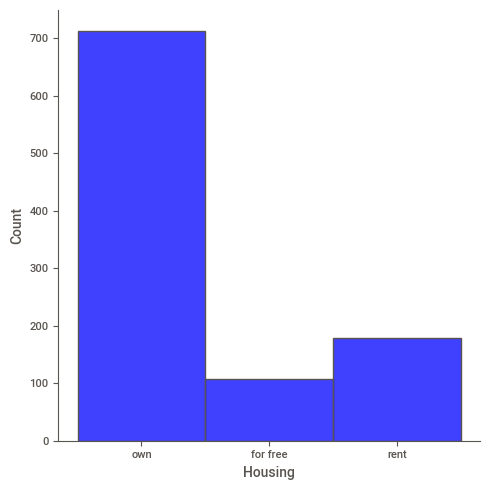

In [64]:
sns.displot(merge['Housing'], kde = False, color = 'blue')


**It is more probable for people who own a house to be in the range of low credit risk but since the majority of people are owning its also not one of the major factor**


<AxesSubplot: ylabel='None'>

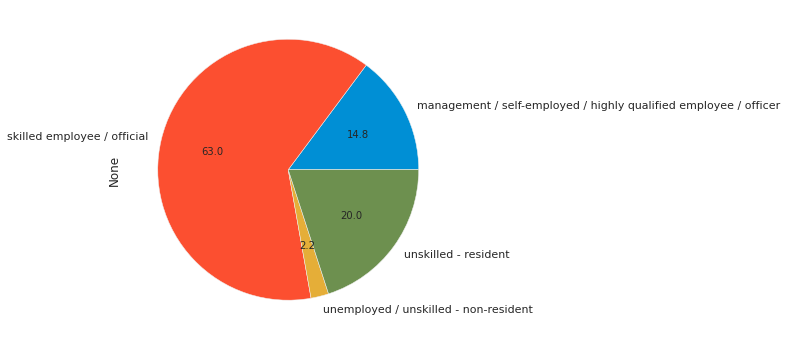

In [22]:
merge.groupby('Employment_status').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))


**The Majority here is employed people it means people with employment also have low risk**

<AxesSubplot: xlabel='Housing', ylabel='count'>

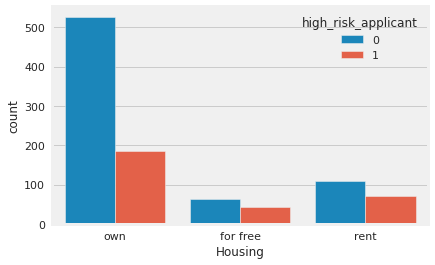

In [23]:
sns.countplot(merge['Housing'],hue=merge['high_risk_applicant'])

**People who own house are the majority here it means people who own house has low risk in comparision to who don't own the house**

<AxesSubplot: ylabel='None'>

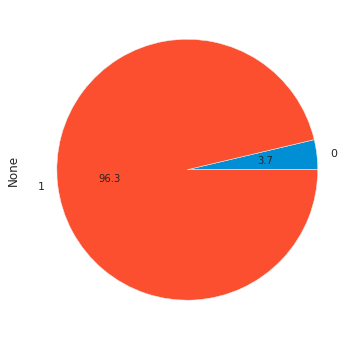

In [24]:
merge.groupby('Foreign_worker').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))


**96% foreign workers it means foreign workers are high risk applicant**

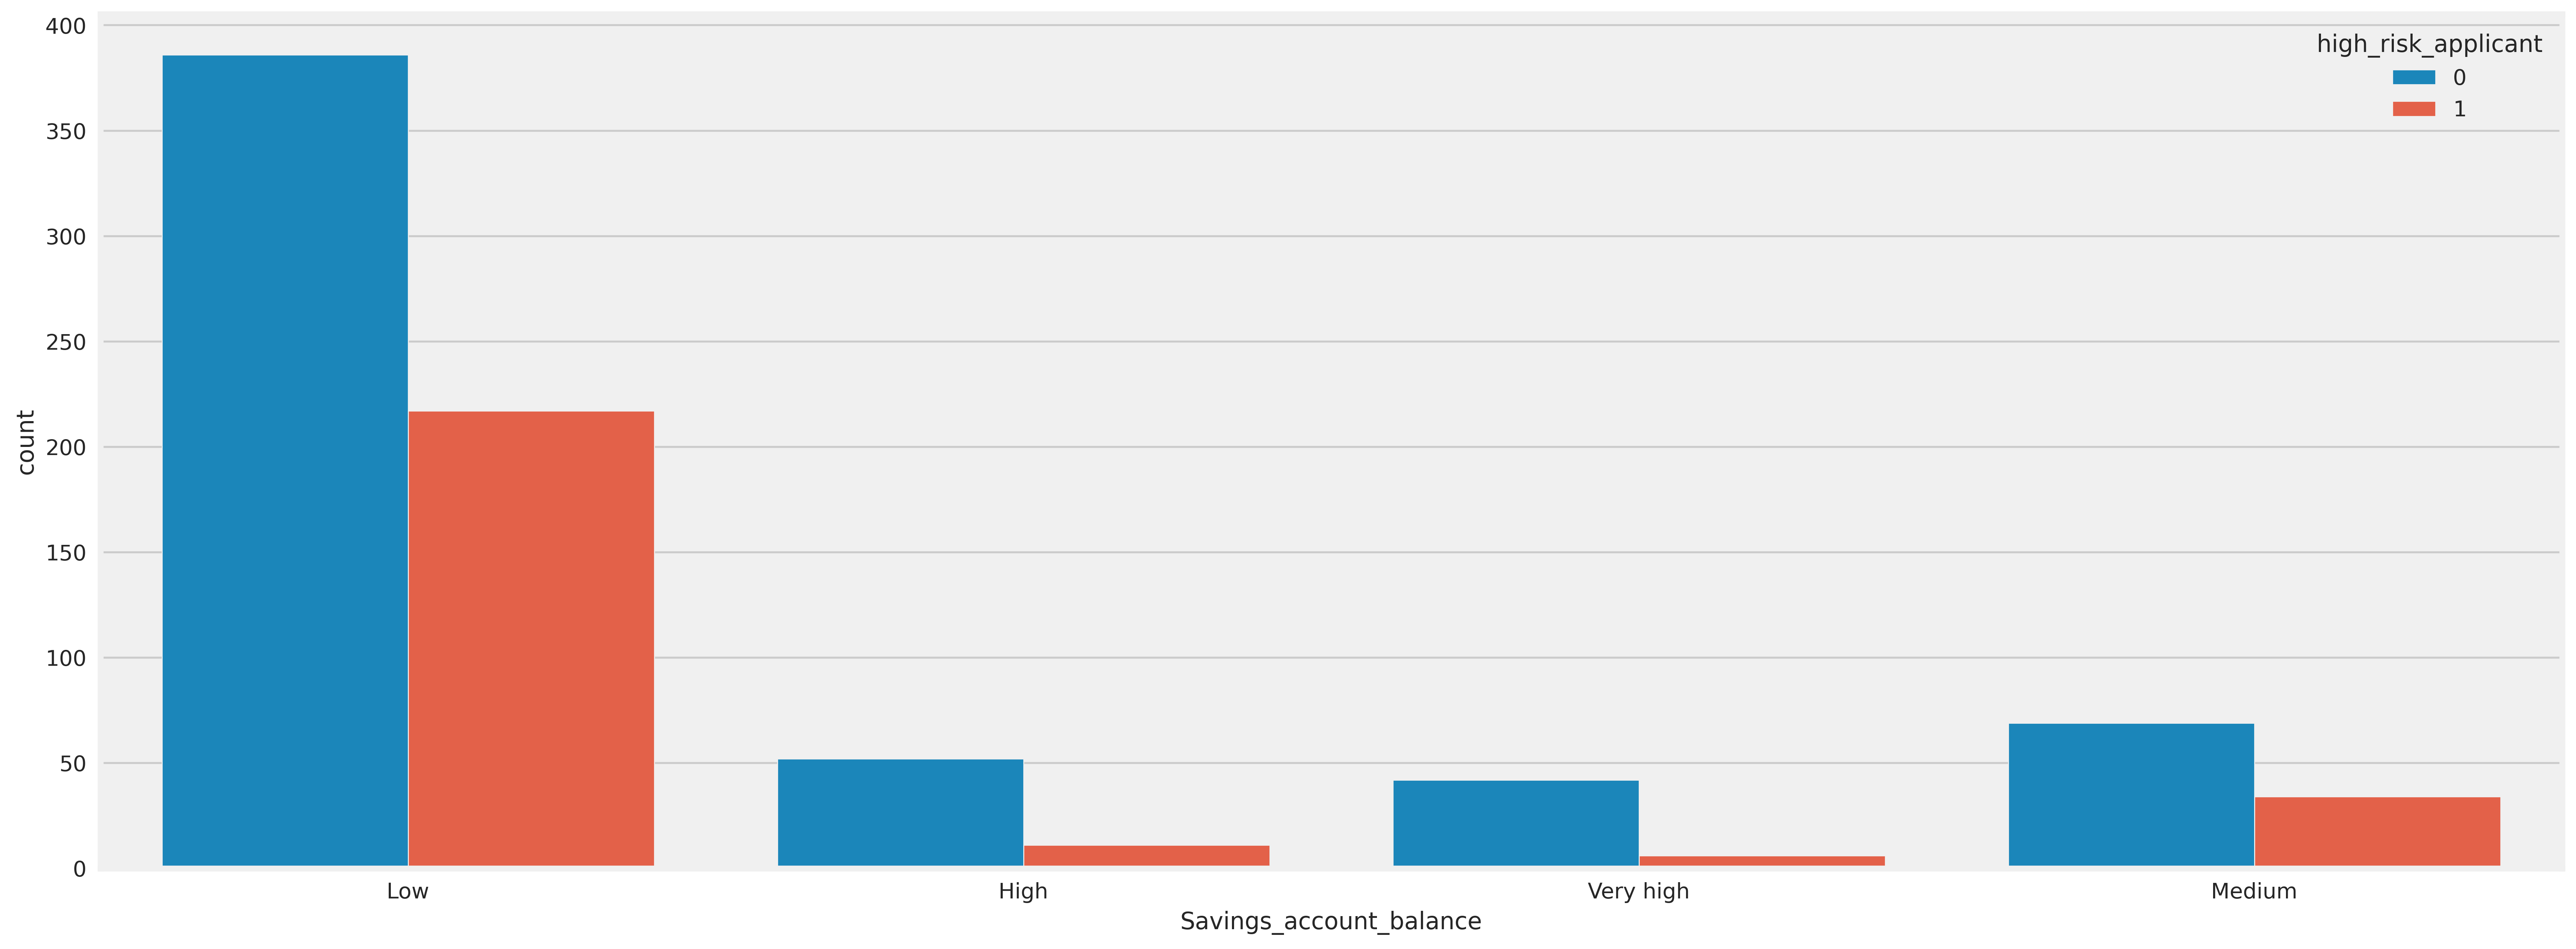

In [25]:
plt.figure(figsize=(20,8),dpi=400)
sns.countplot(merge['Savings_account_balance'],hue=merge['high_risk_applicant'])
plt.show()

**look like people having very high salary has very low chance of high risk creditor**

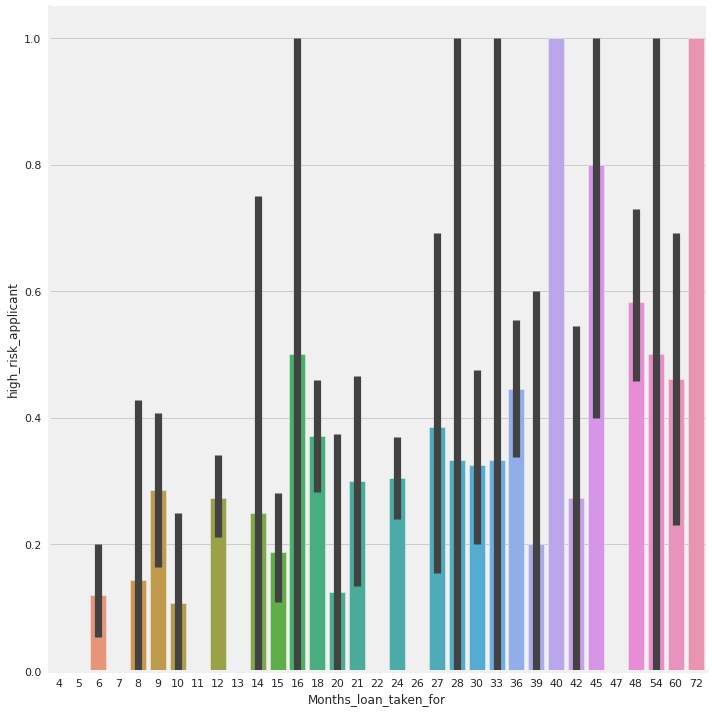

In [30]:
graph = sns.factorplot(x = 'Months_loan_taken_for', y = 'high_risk_applicant', data = merge, kind = "bar", size = 10)
graph = graph.set_ylabels("high_risk_applicant")

**People with long tenure of loan have high risk as the time increasing  there is an increase in risk of returning so time also plays a valueable role in our prediction**

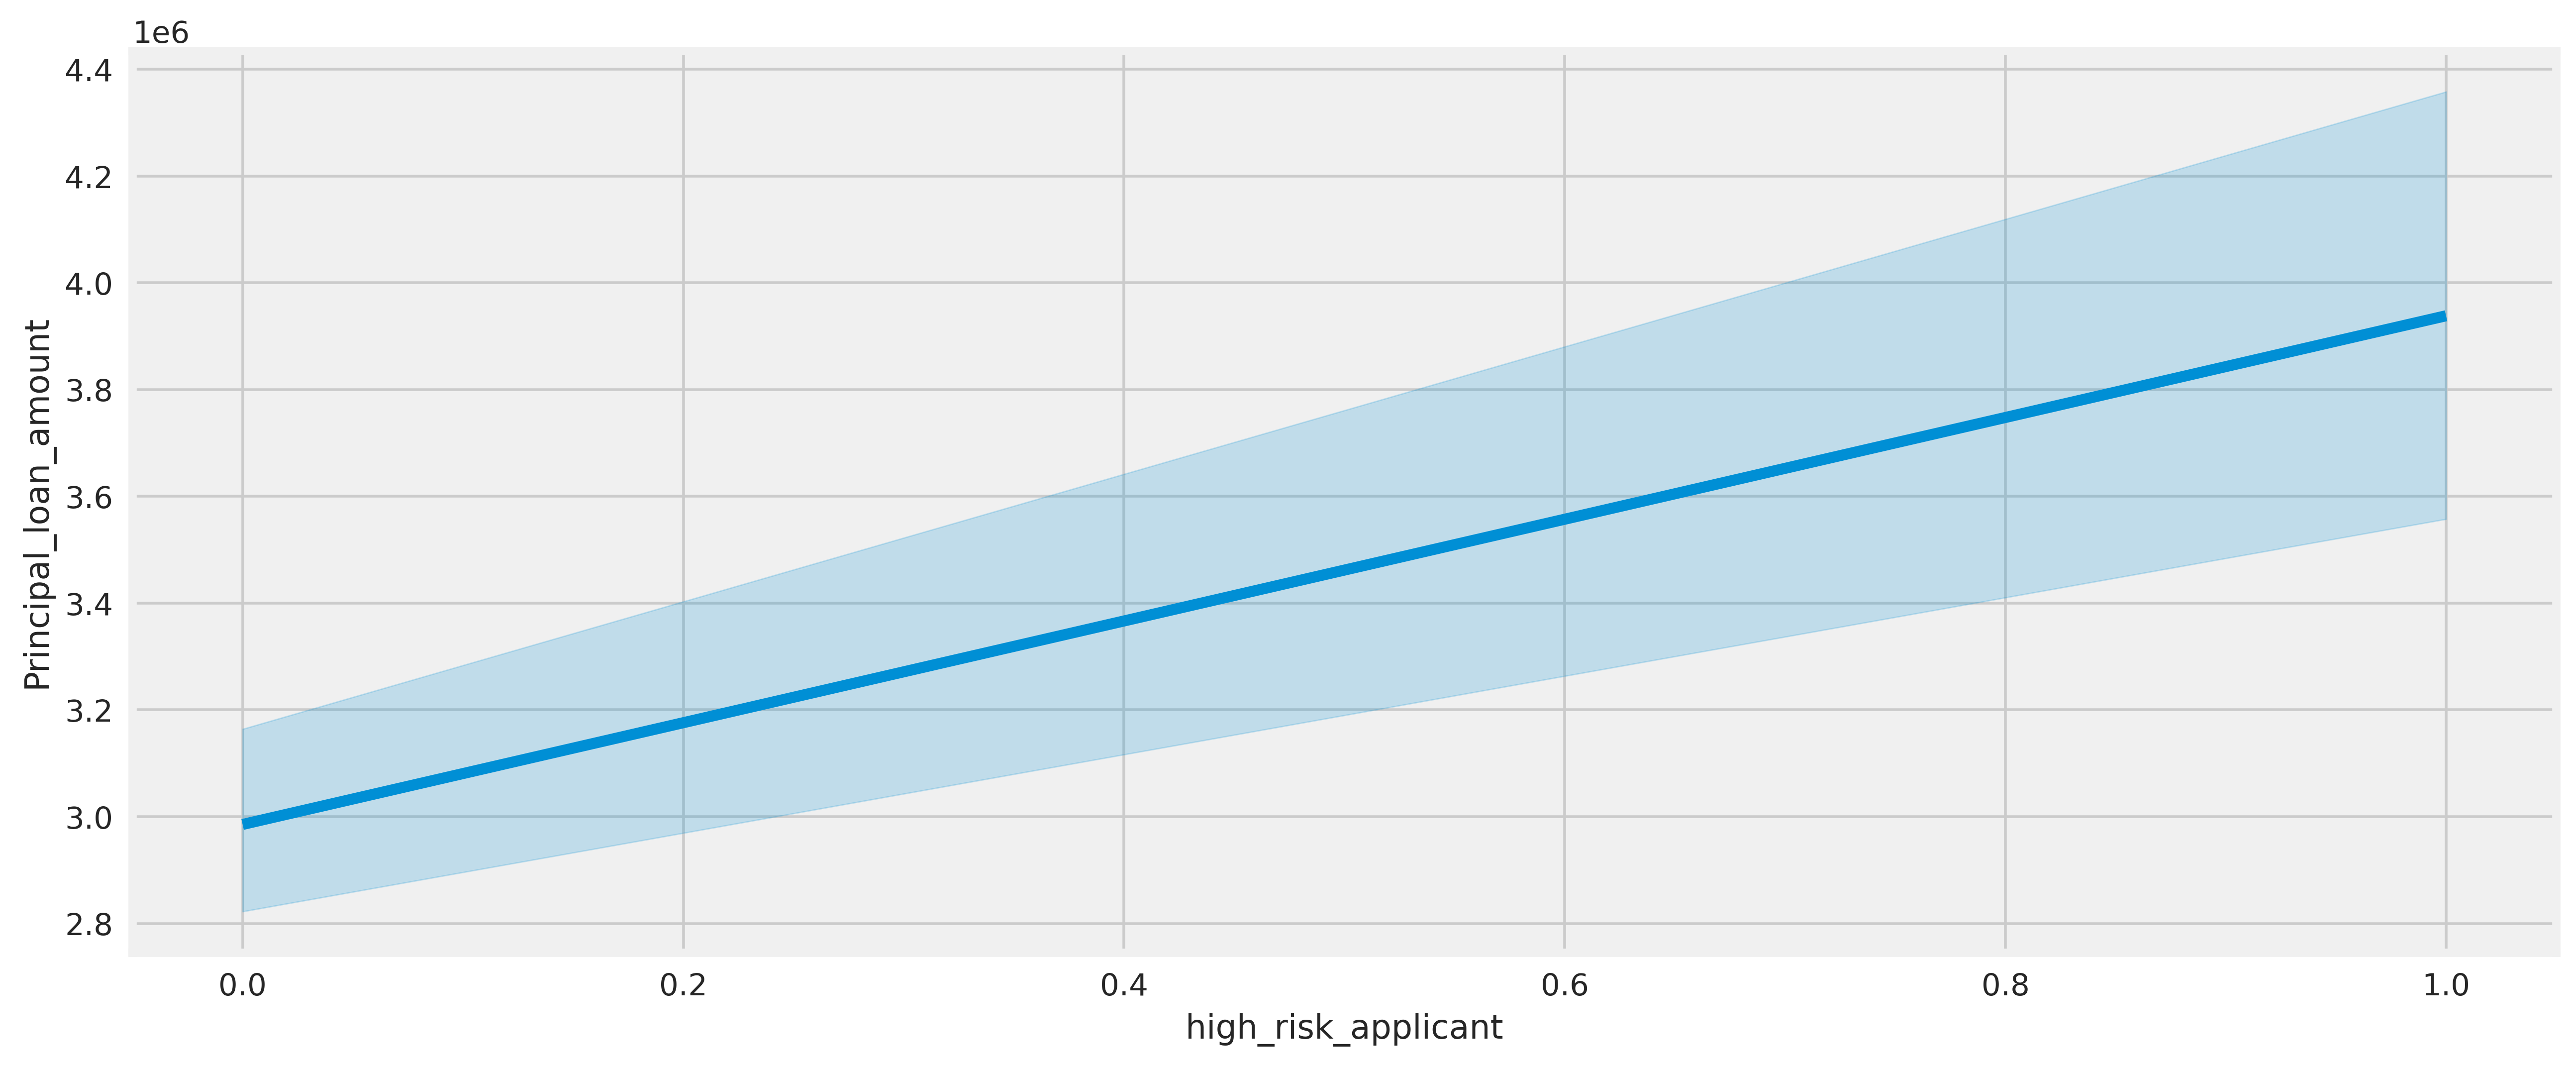

In [27]:
plt.figure(figsize=(14,6),dpi=400)
sns.lineplot( merge['high_risk_applicant'],merge['Principal_loan_amount'])
plt.show()

**From the above plot we can say that people with high loan amount have more high risk creditors**

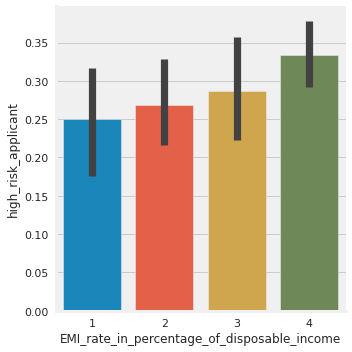

In [28]:
bargraph_EMI = sns.factorplot(x = 'EMI_rate_in_percentage_of_disposable_income', y = 'high_risk_applicant', data = merge, kind = "bar", size = 5)
bargraph_EMI = bargraph_EMI.set_ylabels("high_risk_applicant")

<Figure size 4800x3600 with 0 Axes>

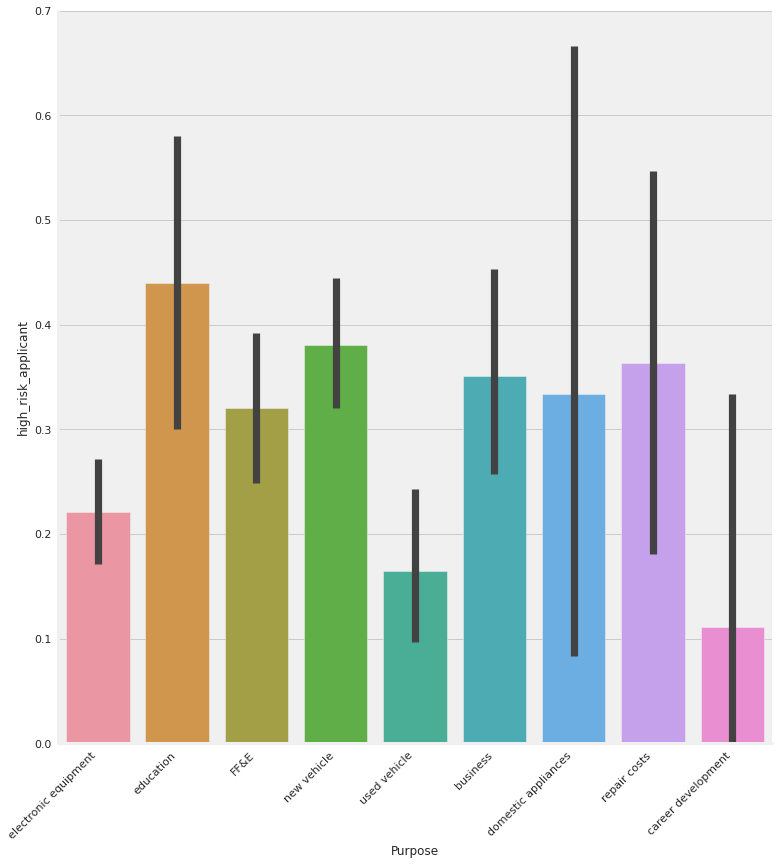

In [37]:
plt.figure(figsize=(16,12),dpi=300)
g = sns.factorplot(x = 'Purpose', y = 'high_risk_applicant', data = merge, kind="bar",size = 11)
g = g.set_ylabels("high_risk_applicant")
plt.xticks(rotation=45, ha="right")
plt.show()

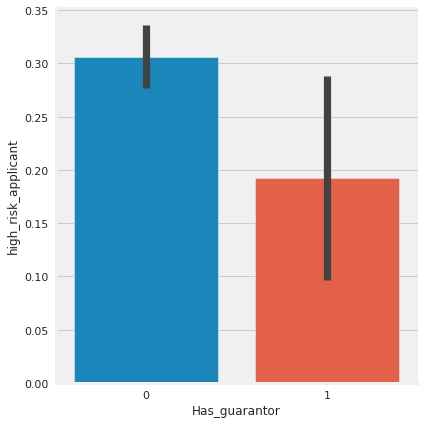

In [49]:
bargraph_guarantor = sns.factorplot(x = 'Has_guarantor', y = 'high_risk_applicant', data = merge, kind = "bar", size = 6)
bargraph_guarantor = bargraph_guarantor.set_ylabels("high_risk_applicant")

**So people with no guarantor lies more in the high risk creditor list and people with guarantor has less risk**

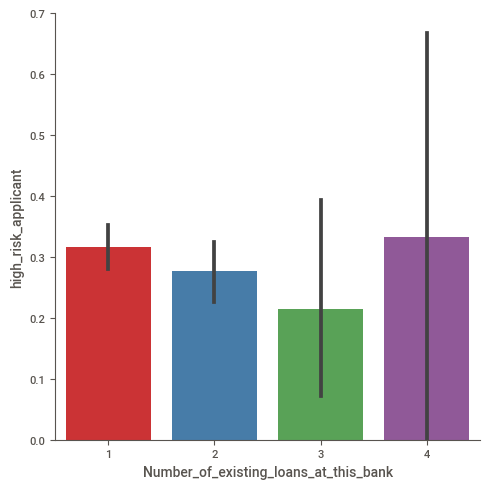

In [66]:
bargraph_EMI = sns.factorplot(x = 'Number_of_existing_loans_at_this_bank', y = 'high_risk_applicant', data = merge, kind = "bar", size = 5)
bargraph_EMI = bargraph_EMI.set_ylabels("high_risk_applicant")

**Cannot determined accurately that people with existing loans are high risky or not , because all value are almost same**

# The question asked in Task 1

# 1. Do the Exploratory Data Analysis & share the insights.

**Done above in EDA part and written below in every plot**


# 2. How would you segment customers based on their risk (of default).

**So customer who will be risk of default**

**1.people with Without job**

**2.foriegners**
**3.people who live on rent or do not have their own house**

**4.People with low salary**

**5. Duration of loan long tenure**

**6.high loan amount**

**7.People with no guarantor**

# 3. Which of these segments / sub-segments would you propose be approved?
  **- For e.g. Would a person with critical credit history be more creditworthy? Are young people more creditworthy? Would a person with more credit accounts be more creditworthy?**

**A person with a critical credit history is generally not considered to be more creditworthy. Credit history is an important factor that lenders consider when determining creditworthiness, and a critical credit history can indicate that an individual has had difficulty managing their credit in the past.**

**It is generally not accurate to say that young people are more or less creditworthy as a group. Creditworthiness is determined on an individual basis and is based on a combination of factors, including credit history, payment history, outstanding debt, and credit utilization.**

**Having more credit accounts may be seen as a positive factor because it can demonstrate to lenders that a person is able to manage multiple credit obligations and make timely payments.**


**From the above statement  I would approve people  with more credit accounts and people with young age are creditworthy and people with critical credit history I would not approve**


# 4.Tell us what your observations were on the data itself (completeness, skews).

**The data have some columns have highly positively skewed or highly negatively skewed it means most of the columns does not have normalize distribution and there are 9 colums having null values , few columns having more than 50% values are null**